In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")
df.head()

,article
0,"['musician', 'tackle', 'u', 'red', 'tape', 'mu..."
1,"['u2s', 'desire', 'number', 'one', 'u2', 'thre..."
2,"['rocker', 'doherty', 'onstage', 'fight', 'roc..."
3,"['snicket', 'top', 'u', 'box', 'office', 'char..."
4,"['ocean', 'twelve', 'raid', 'box', 'office', '..."


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


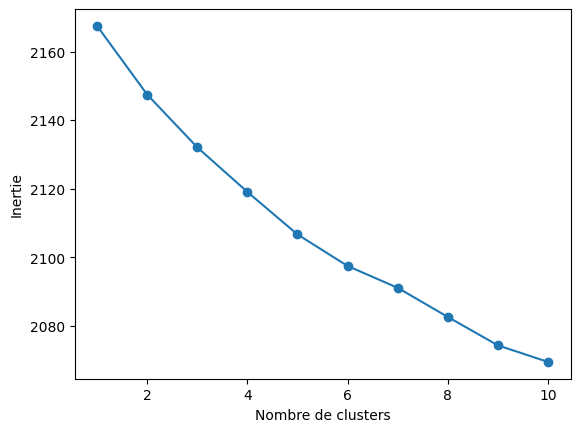

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Créer un vecteur de fonctionnalités
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['article'])

# Calculer l'inertie pour différents nombres de clusters
inertias = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

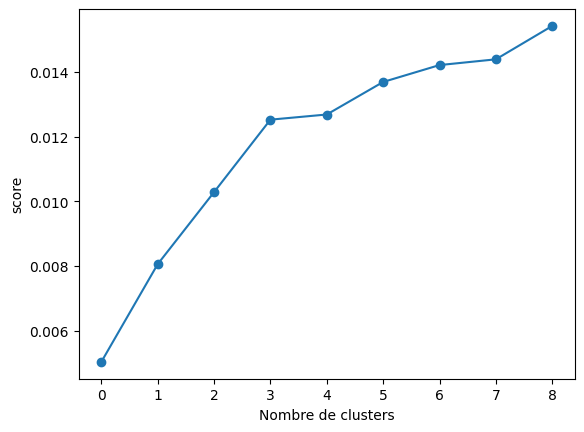

Le meilleur nombre de clusters est : 10


In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['article'])

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# Tracer l'inertie en fonction du nombre de clusters
plt.plot(scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("score")
plt.show()

best_k = np.argmax(scores) + 2
print("Le meilleur nombre de clusters est :", best_k)

In [84]:
import spacy
from scipy import spatial

nlp = spacy.load("en_core_web_md")

# Define the list of topics
topics = ["politics", "business", "informatics", "security",  "ecology", "education", "health", "media" , "gastronomy" , "sport" , "art", "fashion", "history", "animals", "entertainment"]


def topicFromWords(words):

    # Create embeddings for the words
    word_embeddings = [nlp(word).vector for word in words]

    # Create embeddings for the topics
    topic_embeddings = [nlp(topic).vector for topic in topics]

    # Find the most similar topic
    similarities = [spatial.distance.cosine(sum(word_embeddings)/len(word_embeddings), topic_embedding) for topic_embedding in topic_embeddings]
    most_similar_topic = topics[similarities.index(min(similarities))]

    # Print the most similar topic
    return most_similar_topic

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
k_best = 10
df = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")

# Créer un pipeline de traitement des données
vectorizer = TfidfVectorizer()
kmeans = KMeans(n_clusters=k_best)
pipeline = Pipeline([("vectorizer", vectorizer), ("kmeans", kmeans)])

# Entraîner le modèle
X = df['article']
pipeline.fit(X)
df["cluster"] = kmeans.labels_

# Extraire les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Déterminer le vocabulaire associé à chaque cluster
vocabulary = vectorizer.vocabulary_

# Fonction pour trouver les mots les plus pertinents pour chaque cluster
def find_top_words(cluster_index, n_words=10):
    cluster = cluster_centers[cluster_index]
    sorted_indexes = np.argsort(-cluster)
    words = [word for index in sorted_indexes[:n_words] for word, weight in vocabulary.items() if weight == index]
    return words

# Afficher les mots les plus pertinents pour chaque cluster
for i in range(kmeans.n_clusters):
    print(f"Cluster {i+1} : {topicFromWords(find_top_words(i))}")
    #print("Top words:", find_top_words(i))
    #print("\n")

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 : business
Cluster 2 : entertainment
Cluster 3 : sport
Cluster 4 : business
Cluster 5 : business
Cluster 6 : security
Cluster 7 : politics
Cluster 8 : entertainment
Cluster 9 : sport
Cluster 10 : politics


On obient des clusters très précis. Par exemple, les deux premiers clusters sont sur des sujets sportifs, mais traitent de sport différents. 
On pourrait réunir plusieurs clusters entre eux, 5 clusters semble suffisant pour réunir tous les sujets. On change donc le nombre de cluster optimal par 5.

In [63]:
from wordcloud import WordCloud
from PIL import Image

#On créer le nuage de mots pour un cluster donné
def plot_wordcloud(cluster_index, n_words=100):
    words = find_top_words(cluster_index, n_words)
    text = " ".join(words)
    wordcloud = WordCloud(background_color = 'white', width=800, height=400, random_state=21, max_font_size=110,  mask = mask).generate(text)
    return wordcloud

#On charge une image de nuage
mask = np.array(Image.open("cloud.png"))
mask[mask == 1] = 255

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


entertainment
business
informatics
sport
politics


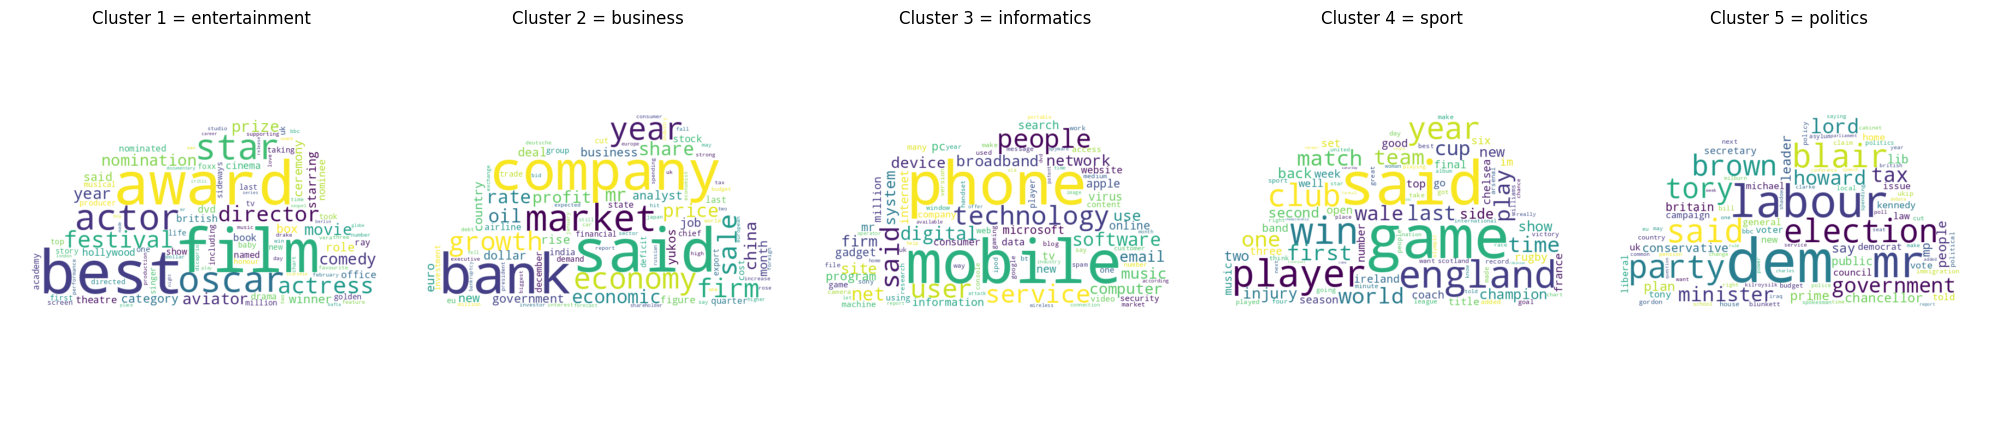

Cluster 1
Top words: ['film', 'award', 'best', 'oscar', 'actor', 'star', 'festival', 'actress', 'director', 'nomination']


Cluster 2
Top words: ['said', 'company', 'bank', 'market', 'year', 'economy', 'growth', 'firm', 'sale', 'price']


Cluster 3
Top words: ['mobile', 'phone', 'technology', 'people', 'said', 'user', 'service', 'software', 'digital', 'net']


Cluster 4
Top words: ['game', 'said', 'england', 'player', 'win', 'year', 'club', 'world', 'first', 'one']


Cluster 5
Top words: ['mr', 'labour', 'election', 'party', 'blair', 'said', 'tory', 'brown', 'would', 'government']




In [86]:
k_best = 5
#Clustering avec KMeans

# Créer un pipeline de traitement des données
vectorizer = TfidfVectorizer()
kmeans = KMeans(n_clusters=k_best)
pipeline = Pipeline([("vectorizer", vectorizer), ("kmeans", kmeans)])

# Entraîner le modèle
X = df['article']
pipeline.fit(X)
df["cluster"] = kmeans.labels_

# Extraire les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Déterminer le vocabulaire associé à chaque cluster
vocabulary = vectorizer.vocabulary_

clusters_topic = {}
for i in range(k_best):
    clusters_topic[i] = topicFromWords(find_top_words(i))
    print(clusters_topic[i])

df["topic"] = df["cluster"].apply(lambda x: clusters_topic[x])

# Créer un nuage de mots pour chaque cluster
wordclouds = [plot_wordcloud(i) for i in range(kmeans.n_clusters)]

# Afficher tous les nuages de mots en utilisant matplotlib
plt.figure(figsize=(20, 12))
for i, wordcloud in enumerate(wordclouds):
    plt.subplot(1, kmeans.n_clusters, i + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Cluster " + str(i + 1) + " = " + topicFromWords(find_top_words(i)))
plt.tight_layout()
plt.show()

# Afficher les mots les plus pertinents pour chaque cluster
for i in range(kmeans.n_clusters):
    print("Cluster", i + 1)
    print("Top words:", find_top_words(i))
    print("\n")

In [79]:
clusters_topic = {}
for i in range(k_best):
    clusters_topic[i] = topicFromWords(find_top_words(i))

df["topic"] = df["cluster"].apply(lambda x: clusters_topic[x])

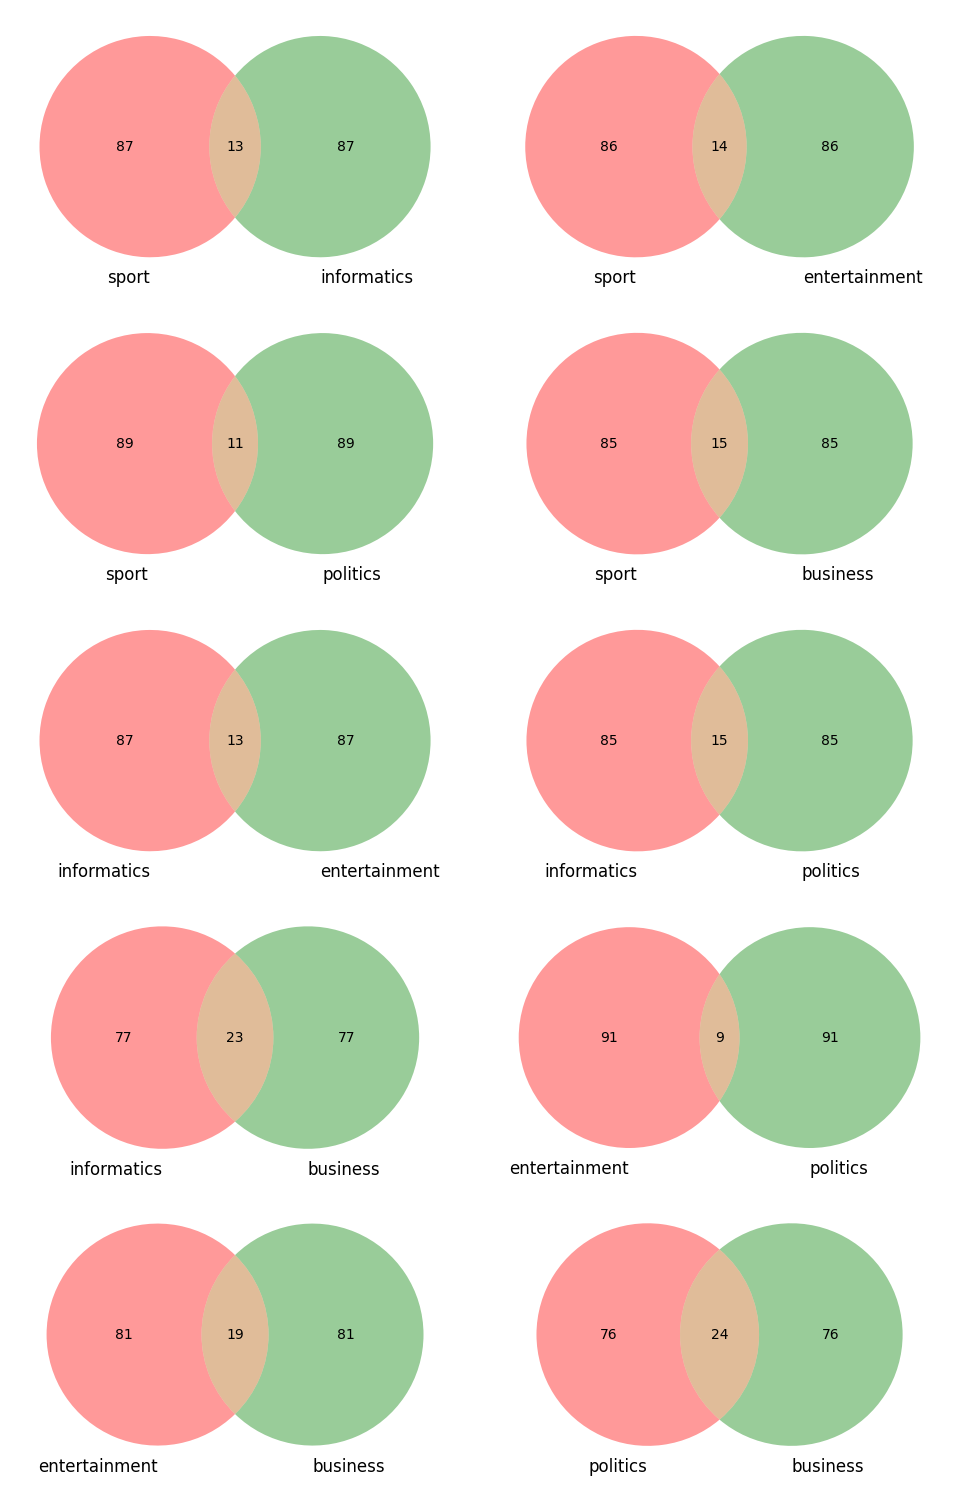

In [75]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

#Les mots les plus communs dans les deux clusters
cluster1 = set(find_top_words(0))
cluster2 = set(find_top_words(1))
cluster3 = set(find_top_words(2))
cluster4 = set(find_top_words(3))
cluster5 = set(find_top_words(4))

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))

venn2([cluster1, cluster2], set_labels=(topicFromWords(find_top_words(0)), topicFromWords(find_top_words(1))), ax=ax[0, 0])
venn2([cluster1, cluster3], set_labels=(topicFromWords(find_top_words(0)), topicFromWords(find_top_words(2))), ax=ax[0, 1])
venn2([cluster1, cluster4], set_labels=(topicFromWords(find_top_words(0)), topicFromWords(find_top_words(3))), ax=ax[1, 0])
venn2([cluster1, cluster5], set_labels=(topicFromWords(find_top_words(0)), topicFromWords(find_top_words(4))), ax=ax[1, 1])
venn2([cluster2, cluster3], set_labels=(topicFromWords(find_top_words(1)), topicFromWords(find_top_words(2))), ax=ax[2, 0])
venn2([cluster2, cluster4], set_labels=(topicFromWords(find_top_words(1)), topicFromWords(find_top_words(3))), ax=ax[2, 1])
venn2([cluster2, cluster5], set_labels=(topicFromWords(find_top_words(1)), topicFromWords(find_top_words(4))), ax=ax[3, 0])
venn2([cluster3, cluster4], set_labels=(topicFromWords(find_top_words(2)), topicFromWords(find_top_words(3))), ax=ax[3, 1])
venn2([cluster3, cluster5], set_labels=(topicFromWords(find_top_words(2)), topicFromWords(find_top_words(4))), ax=ax[4, 0])
venn2([cluster4, cluster5], set_labels=(topicFromWords(find_top_words(3)), topicFromWords(find_top_words(4))), ax=ax[4, 1])

plt.tight_layout()
plt.show()

In [80]:
df.to_csv("clusterized_df.csv", index=False)